# Importing datasets

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Lambda, Normalize

transform = Compose ([
    ToTensor(),
    Normalize((0.1377), (0.3130)),
    Lambda(lambda image : image.view(784))
])

# Datasets
data_train = MNIST(root="./", download=True, train=True, transform=transform)
data_test = MNIST(root="./", download=True, train=False, transform=transform)

data = MNIST(root="./", download=True, train=False, transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 244482471.92it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10636201.06it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 79674332.35it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19262415.34it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# Model Definition

In [3]:
from torch import nn,optim

# Accesing gpu if available
def get_default_device():
  return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

def to_t(tensor,device=get_default_device()):
  return tensor.to(device)

#Model definition
class MNISTModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.layers = nn.Sequential(
          nn.Linear(784,420),
          nn.ReLU(),
          nn.Linear(420,10)
      )
      self.loss = nn.CrossEntropyLoss()
      self.optimizer = optim.Adam(self.parameters())  #lr = 0.001 by default
      self.to(get_default_device())

  def forward(self,X):
      return self.layers(X)

  def predict(self,X):
      with torch.no_grad():
        return torch.argmax(self.forward(X),axis=-1)

  def fit(self,X,Y):
      self.optimizer.zero_grad()
      y_pred = self.forward(X)
      loss = self.loss(y_pred,Y)
      loss.backward()
      self.optimizer.step()

      return loss.item()

# Training of the model

In [4]:
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
from tqdm import tqdm

#hyper params
k_folds = 5
accuracy = {}
epoch = 5
batch_size = 25
PATH = "model.pth"


min_loss = 9999

Fold : 0


Fitting Epoch 1: 100%|██████████| 1920/1920 [00:22<00:00, 84.59it/s] 


Epoch 1: 0.2126


Fitting Epoch 2: 100%|██████████| 1920/1920 [00:13<00:00, 145.20it/s]


Epoch 2: 0.0963


Fitting Epoch 3: 100%|██████████| 1920/1920 [00:13<00:00, 143.00it/s]


Epoch 3: 0.0673


Fitting Epoch 4: 100%|██████████| 1920/1920 [00:13<00:00, 146.84it/s]


Epoch 4: 0.0538


Fitting Epoch 5: 100%|██████████| 1920/1920 [00:13<00:00, 144.07it/s]


Epoch 5: 0.0423
Fold : 1


Fitting Epoch 1: 100%|██████████| 1920/1920 [00:13<00:00, 143.29it/s]


Epoch 1: 0.2088


Fitting Epoch 2: 100%|██████████| 1920/1920 [00:14<00:00, 135.49it/s]


Epoch 2: 0.0916


Fitting Epoch 3: 100%|██████████| 1920/1920 [00:13<00:00, 145.01it/s]


Epoch 3: 0.0677


Fitting Epoch 4: 100%|██████████| 1920/1920 [00:13<00:00, 144.12it/s]


Epoch 4: 0.0494


Fitting Epoch 5: 100%|██████████| 1920/1920 [00:13<00:00, 144.67it/s]


Epoch 5: 0.0407
Fold : 2


Fitting Epoch 1: 100%|██████████| 1920/1920 [00:14<00:00, 136.77it/s]


Epoch 1: 0.2068


Fitting Epoch 2: 100%|██████████| 1920/1920 [00:13<00:00, 142.77it/s]


Epoch 2: 0.0918


Fitting Epoch 3: 100%|██████████| 1920/1920 [00:13<00:00, 144.64it/s]


Epoch 3: 0.0648


Fitting Epoch 4: 100%|██████████| 1920/1920 [00:13<00:00, 141.25it/s]


Epoch 4: 0.0505


Fitting Epoch 5: 100%|██████████| 1920/1920 [00:13<00:00, 141.66it/s]


Epoch 5: 0.0419
Fold : 3


Fitting Epoch 1: 100%|██████████| 1920/1920 [00:13<00:00, 142.29it/s]


Epoch 1: 0.2151


Fitting Epoch 2: 100%|██████████| 1920/1920 [00:13<00:00, 143.63it/s]


Epoch 2: 0.0962


Fitting Epoch 3: 100%|██████████| 1920/1920 [00:13<00:00, 141.12it/s]


Epoch 3: 0.0657


Fitting Epoch 4: 100%|██████████| 1920/1920 [00:13<00:00, 142.91it/s]


Epoch 4: 0.0534


Fitting Epoch 5: 100%|██████████| 1920/1920 [00:13<00:00, 141.81it/s]


Epoch 5: 0.0423
Fold : 4


Fitting Epoch 1: 100%|██████████| 1920/1920 [00:14<00:00, 134.87it/s]


Epoch 1: 0.2117


Fitting Epoch 2: 100%|██████████| 1920/1920 [00:13<00:00, 139.15it/s]


Epoch 2: 0.0927


Fitting Epoch 3: 100%|██████████| 1920/1920 [00:13<00:00, 140.72it/s]


Epoch 3: 0.0657


Fitting Epoch 4: 100%|██████████| 1920/1920 [00:13<00:00, 140.75it/s]


Epoch 4: 0.0501


Fitting Epoch 5: 100%|██████████| 1920/1920 [00:13<00:00, 142.54it/s]


Epoch 5: 0.0411


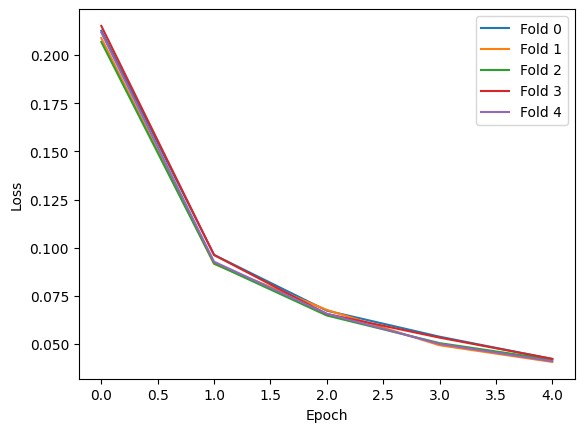

In [5]:
kfold = KFold(n_splits = k_folds, shuffle = True)

for fold, (train_ids, test_ids) in enumerate(kfold.split(data_train)):
  print(f'Fold : {fold}')

  loss_list = []
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)

  dataloader_train = DataLoader(data_train, batch_size=batch_size, sampler = train_subsampler)
  dataloader_test = DataLoader(data_train, batch_size=batch_size, sampler = test_subsampler)

  mnist_model = MNISTModel()

  for i in range(epoch):
    total_loss = 0
    for r_xs,r_ys in tqdm(dataloader_train, desc=f"Fitting Epoch {i+1}"):
      xs,ys = to_t(r_xs), to_t(r_ys)
      total_loss +=mnist_model.fit(xs,ys)

    total_loss /= len(dataloader_train)

    loss_list+= [total_loss]
    print(f"Epoch {i+1}: {total_loss:.4f}")

  plt.plot(loss_list, label=f'Fold {fold}')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
# plt.title(f"distribution of pixels of {i} value {data_train[i][1]}")

  correct = 0
  for r_xs,r_ys in dataloader_test:
    xs,ys = to_t(r_xs), to_t(r_ys)
    y_pred = mnist_model.predict(xs)
    correct += (ys == y_pred).sum()
  accuracy[fold] = correct/(len(dataloader_test)*batch_size)
  val_loss = accuracy[fold]

  if val_loss<min_loss :
    min_loss = val_loss
    torch.save(mnist_model.state_dict(),PATH)

plt.legend()
plt.show()

# Accuracies and predictions


In [6]:
print(f'Kfold cross-validation results for {k_folds} folds')

sum = 0.0
for key, value in accuracy.items():
  print(f"Fold {key} = {value}")
  sum += value

print(f'Average accuracy = {sum/len(accuracy.items())}')

Kfold cross-validation results for 5 folds
Fold 0 = 0.971916675567627
Fold 1 = 0.9735833406448364
Fold 2 = 0.9742500185966492
Fold 3 = 0.9758332967758179
Fold 4 = 0.9711666703224182
Average accuracy = 0.9733499884605408


In [8]:
from sklearn.metrics import confusion_matrix, f1_score
from IPython.display import Image
dataloader_test = DataLoader(data_test, batch_size=batch_size)

#load model
final_mnist_model = MNISTModel()
final_mnist_model.load_state_dict(torch.load(PATH))
final_mnist_model.eval()

matrix = torch.zeros(10,10)
correct = 0
preds = torch.empty(0)
targets = torch.empty(0)

preds,targets = to_t(preds), to_t(targets)

for i,(r_xs,r_ys) in enumerate(dataloader_test):
  xs,ys = to_t(r_xs), to_t(r_ys)
  y_pred = final_mnist_model.predict(xs)
  preds = torch.cat((preds,y_pred))
  targets = torch.cat((targets,ys))
  correct += (ys == y_pred).sum()
  for j in range(25):
    if y_pred[j].item()==3 and ys[j].item()==8 :
      index = i*25 + j
      display(data[index][0])

matrix = confusion_matrix(preds.cpu().numpy(),targets.cpu().numpy())
print(matrix)

f1score = f1_score(preds.cpu().numpy(),targets.cpu().numpy(), average = 'micro')
print(f"F1 score: {f1score}")
accuracy = correct/(len(dataloader_test)*batch_size)
print(f"Accuracy: {accuracy}")

[[ 966    0    7    0    1    2    2    0    2    1]
 [   0 1128    5    0    0    4    8    6    0    2]
 [   0    1  977    2    1    0    0    4    0    0]
 [   2    1    7  989    1   10    2   14    4    5]
 [   0    0    8    0  947    3    1    3    3    7]
 [   2    0    0    4    0  860    3    0    4    3]
 [   5    0    4    0    5    4  937    0    2    1]
 [   1    1   11    2    1    0    0  975    2    1]
 [   3    4   13    6    0    6    5    2  947    0]
 [   1    0    0    7   26    3    0   24   10  989]]
F1 score: 0.9715
Accuracy: 0.9714999794960022
